In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

In [2]:
jobpost_df = pd.read_csv("Resources/job.csv")
jobpost_df.head()

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
jobpost_df['fraudulent'] = jobpost_df['fraudulent'].astype(str)

In [4]:
jobpost_df["fraudulent"].replace({"0": "Real", "1": "Fake"}, inplace=True)
jobpost_df.head()

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,Real
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,Real
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,Real
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,Real
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,Real


In [5]:
# Generate a pie plot showing the distribution of Movies vs TV Shows using pandas
post_type = jobpost_df.groupby('fraudulent')

# create a DataFrame
post_type_count = pd.DataFrame(post_type['fraudulent'].count())
post_type_count

,fraudulent
fraudulent,
Fake,866
Real,17014


Text(0.5, 1.0, 'Real or Fake Job Post')

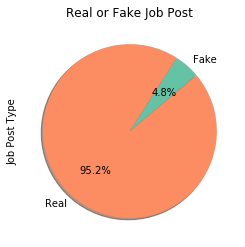

In [6]:
fig, ax = plt.subplots()

post_type_count.plot(kind='pie', y="fraudulent", colors=sns.color_palette("Set2"), autopct='%1.1f%%', shadow=True, startangle=40, legend=False, ax=ax)

ax.set_ylabel('Job Post Type')
ax.set_title("Real or Fake Job Post")

# plt.savefig("figures/RealorFake_pie.png")

Text(672.684375, 0.5, 'No. of Posts')

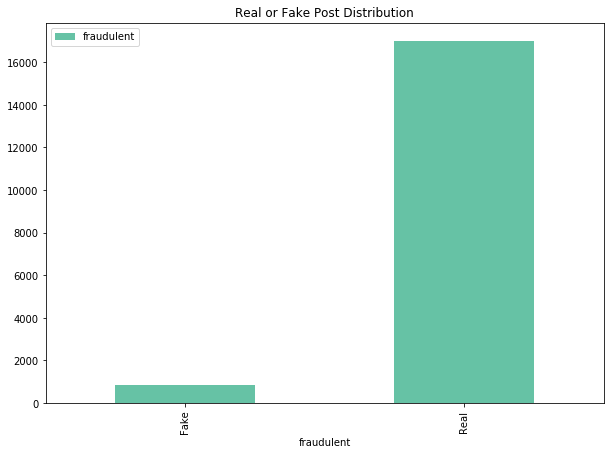

In [18]:
post_type_count.plot.bar(color=sns.color_palette("Set2"), figsize=(10,7), title="Real or Fake Post Distribution")
ax.set_xlabel("Real or Fake Job Post")
ax.set_ylabel("No. of Posts")

Text(0, 0.5, 'No. of Jobs')

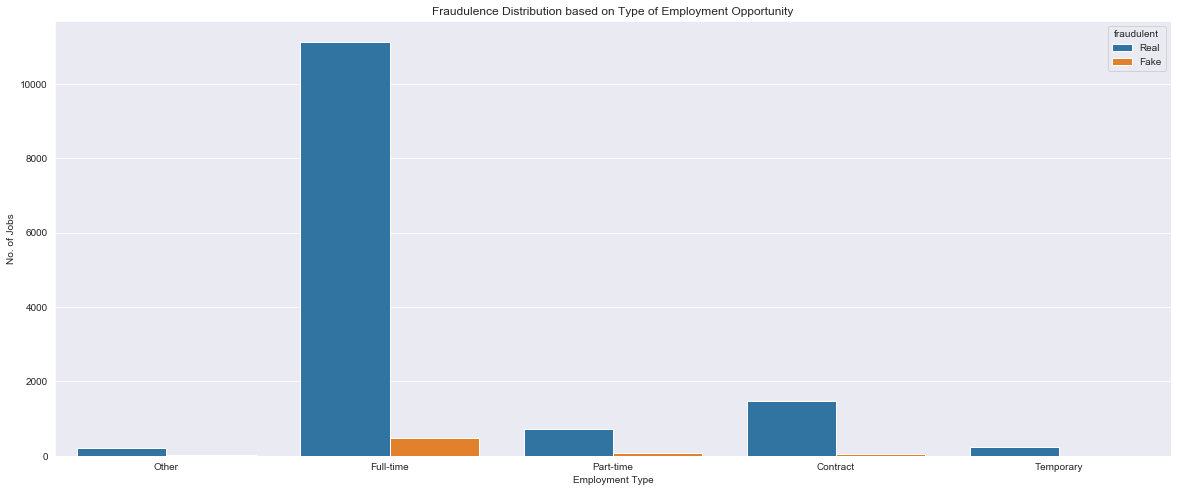

In [107]:
sns.color_palette("Set2")
plt.figure(1,figsize=(20,8))
sns.countplot(hue=jobpost_df.fraudulent,x=jobpost_df.employment_type)
plt.title('Fraudulence Distribution based on Type of Employment Opportunity')
plt.xlabel('Employment Type')
plt.ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

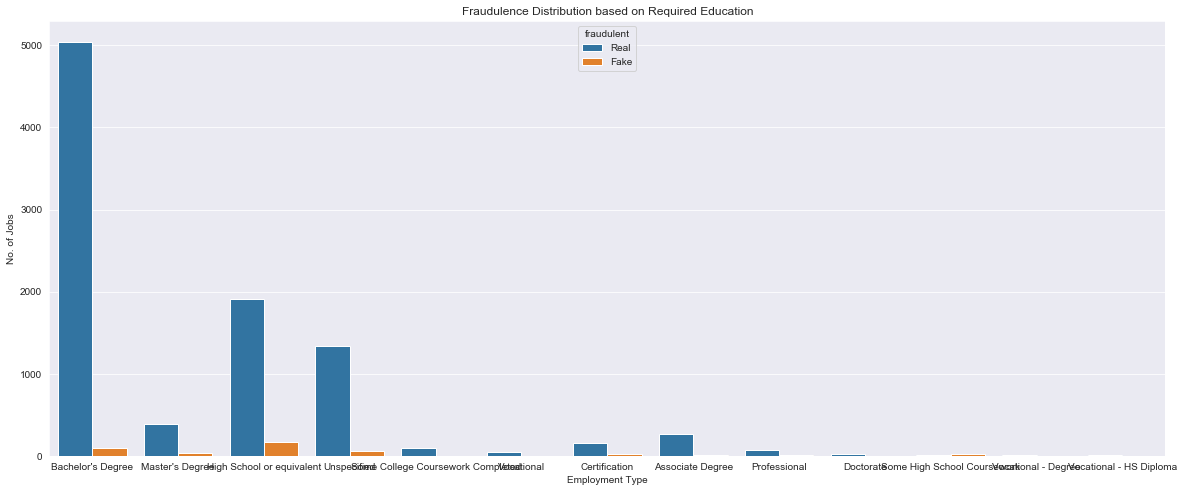

In [110]:
sns.color_palette("Set2")
plt.figure(1,figsize=(20,8))
sns.countplot(hue=jobpost_df.fraudulent,x=jobpost_df.required_education)
plt.title('Fraudulence Distribution based on Required Education')
plt.xlabel('Employment Type')
plt.ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

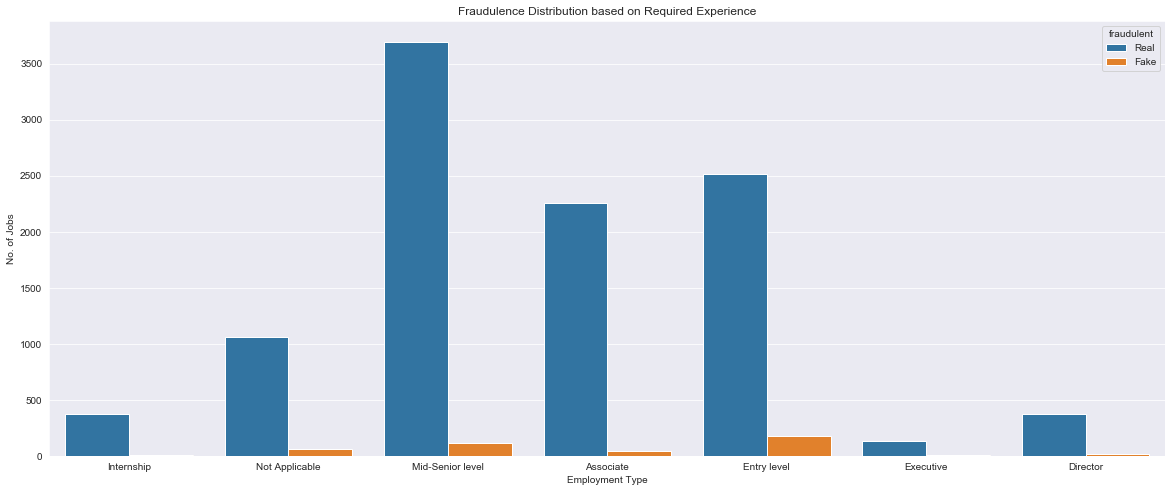

In [111]:
sns.color_palette("Set2")
plt.figure(1,figsize=(20,8))
sns.countplot(hue=jobpost_df.fraudulent,x=jobpost_df.required_experience)
plt.title('Fraudulence Distribution based on Required Experience')
plt.xlabel('Employment Type')
plt.ylabel('No. of Jobs')

In [114]:
# Shows top 10 Industries with Job Posts
industry = jobpost_df.groupby(["industry", "fraudulent"])

industry_top10 = pd.DataFrame(industry["industry"].count().nlargest(10).reset_index(name='count'))
industry_top10

,industry,fraudulent,count
0,Information Technology and Services,Real,1702
1,Computer Software,Real,1371
2,Internet,Real,1062
3,Education Management,Real,822
4,Marketing and Advertising,Real,783
5,Financial Services,Real,744
6,Hospital & Health Care,Real,446
7,Consumer Services,Real,334
8,Telecommunications,Real,316
9,Retail,Real,218


In [115]:
# top 10 Industry by Fake
industry_fake = jobpost_df[(jobpost_df['fraudulent'] == 'Fake')]
industry_fake_df = industry_fake.groupby(['industry', 'fraudulent']).size().reset_index(name='count').sort_values("count", ascending=False)
industry_fake_df.head(10)

,industry,fraudulent,count
48,Oil & Energy,Fake,109
0,Accounting,Fake,57
31,Hospital & Health Care,Fake,51
42,Marketing and Advertising,Fake,45
28,Financial Services,Fake,35
35,Information Technology and Services,Fake,32
57,Telecommunications,Fake,26
53,Real Estate,Fake,24
18,Consumer Services,Fake,24
38,"Leisure, Travel & Tourism",Fake,21


### Job Titles - Fake Posts

In [19]:
# Generate a pie plot showing the distribution of Movies vs TV Shows using pandas
jobtitle = jobpost_df.groupby('title')

# create a DataFrame
jobtitle_df = pd.DataFrame(jobtitle['fraudulent'].count())
jobtitle_df

,fraudulent
title,
Electrician,1
Environmental Technician I,1
Piping Material Engineer,1
"Discipline Manager Civil, Structural, Marine, Architectural",1
FEA Senior engineer,1
...,...
warehouse opperative,1
web designer,1
web project manager,1


In [48]:
# Shows top 10 Genres in total
jobtitles = jobpost_df.groupby(["title", "fraudulent"])

jobtitles_top10 = pd.DataFrame(jobtitles["title"].count().nlargest(10).reset_index(name='count'))
jobtitles_top10

,title,fraudulent,count
0,English Teacher Abroad,Real,311
1,Customer Service Associate,Real,146
2,Graduates: English Teacher Abroad (Conversatio...,Real,144
3,English Teacher Abroad,Real,95
4,Software Engineer,Real,86
5,English Teacher Abroad (Conversational),Real,83
6,Customer Service Associate - Part Time,Real,76
7,Account Manager,Real,73
8,Web Developer,Real,66
9,Project Manager,Real,62


In [59]:
# top 10 Job Titles by Fake
jobtitles_fake = jobpost_df[(jobpost_df['fraudulent'] == 'Fake')]
jobtitles_fake_df = jobtitles_fake.groupby(['title', 'fraudulent']).size().reset_index(name='count').sort_values("count", ascending=False)
jobtitles_fake_df.head(10)

,title,fraudulent,count
257,Home Based Payroll Typist/Data Entry Clerks Po...,Fake,21
133,Cruise Staff Wanted *URGENT*,Fake,21
162,Data Entry Admin/Clerical Positions - Work Fro...,Fake,21
144,Customer Service Representative,Fake,17
48,Administrative Assistant,Fake,16
256,Home Based Payroll Data Entry Clerk Position -...,Fake,12
321,Network Marketing,Fake,10
369,Payroll Data Coordinator Positions - Earn $100...,Fake,10
367,Payroll Clerk,Fake,10
29,"Account Sales Managers $80-$130,000/yr",Fake,10


Text(0.5, 1.0, 'Top 10 Fake Posts by Job Title')

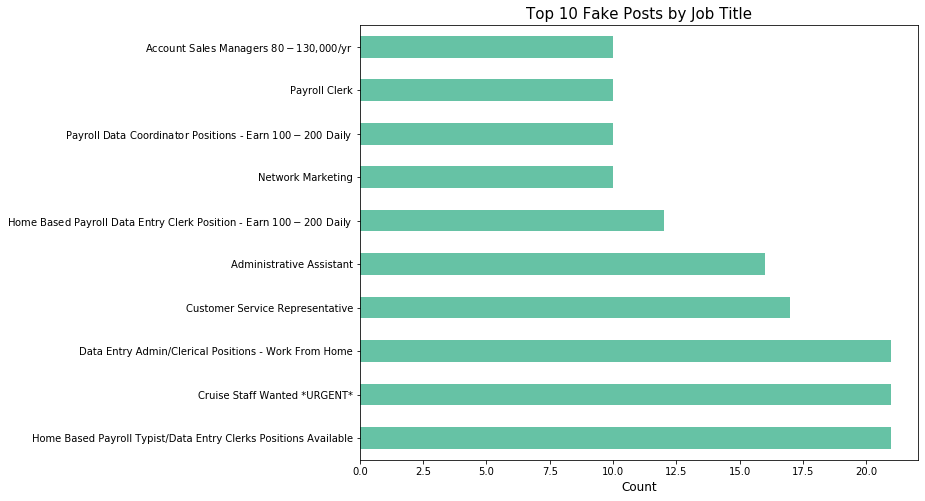

In [61]:
# fake_jobs horizontal bar chart
fig, ax = plt.subplots()
jobtitles_fake_df.head(10).plot(kind='barh', color=sns.color_palette("Set2"),legend=False, figsize=(10,8), ax=ax)
ax.set_yticklabels(jobtitles_fake_df.head(10)["title"])
ax.set_xlabel("Count",fontsize=12)
# ax.set_ylabel("Job Title",fontsize=12)
ax.set_title("Top 10 Fake Posts by Job Title",fontsize=15)
# plt.savefig("figures/TopFakejobtitles_Bar.png")

### Text Analysis

In [8]:
text_df = jobpost_df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df = text_df.fillna(' ')

text_df.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Real
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Real
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,Real
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Real
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Real


## Character & Word Counts

### Description

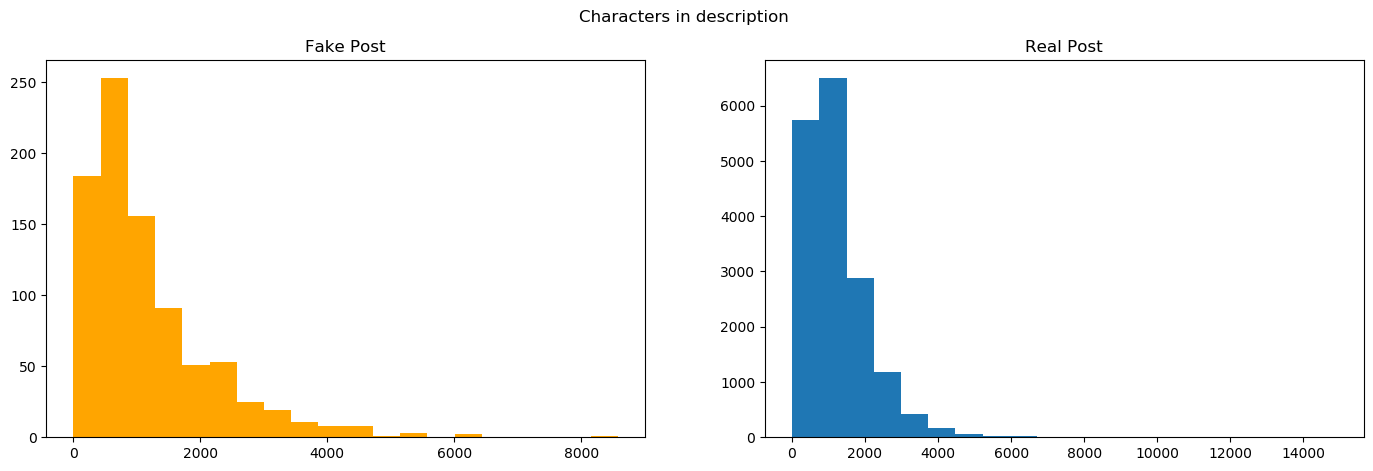

In [9]:
# Characters Description
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]=='Fake']['description'].str.len()
ax1.hist(length,bins = 20,color='orange')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]=='Real']['description'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

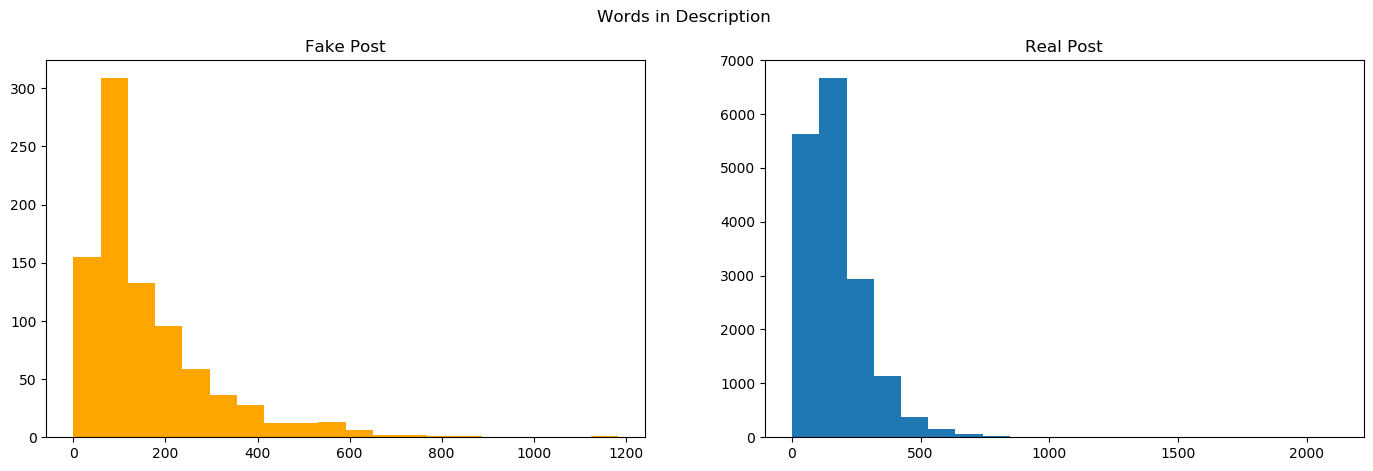

In [10]:
# Word Count in Description
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]=='Fake']['description'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orange')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]=='Real']['description'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in Description')
plt.show()

#### Characters & Word Counts in Description are relatively the same, but some Fake job posts have characters of 5000 and 6000.

### Company Profile

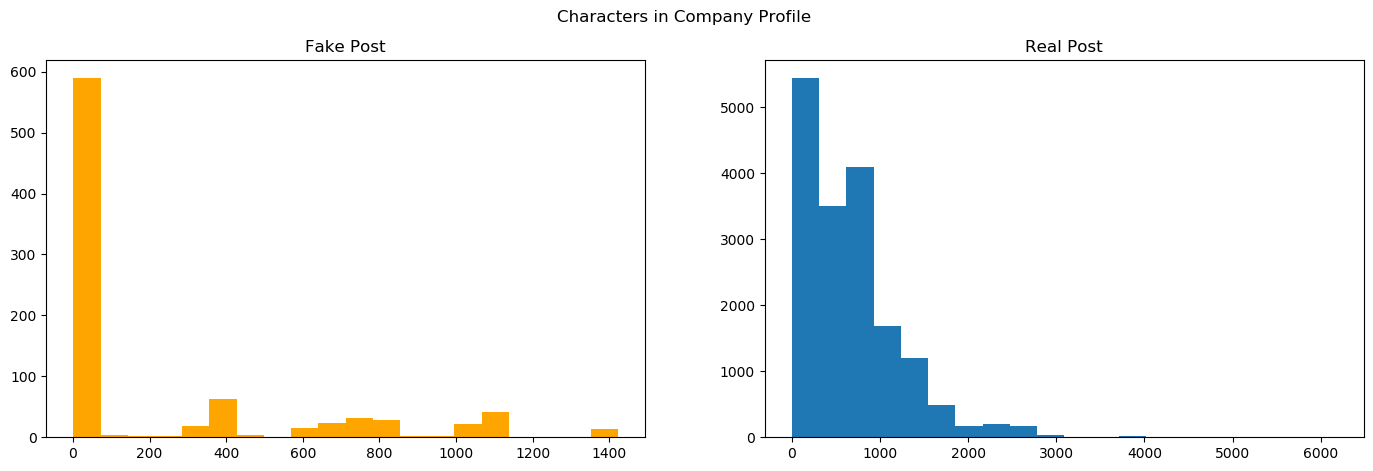

In [11]:
# Characters in Company Profile
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]=='Fake']['company_profile'].str.len()
ax1.hist(length,bins = 20,color='orange')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]=='Real']['company_profile'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in Company Profile')
plt.show()

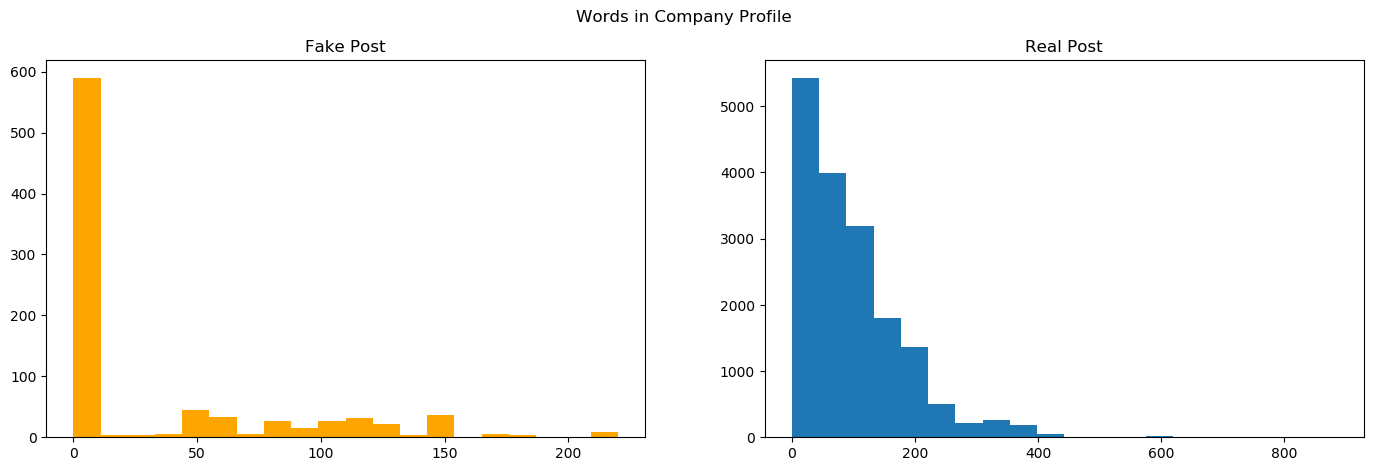

In [12]:
# Word Count in Company Profile
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]=='Fake']['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orange')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]=='Real']['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in Company Profile')
plt.show()

#### Fake posts have less characters & words in Company profile than Real Posts

### Requirements

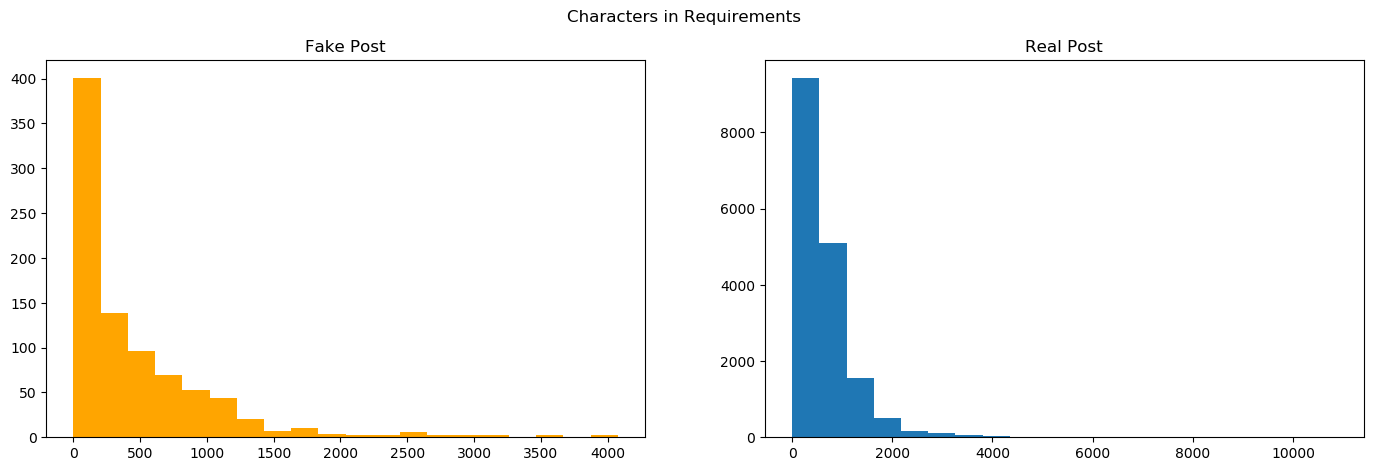

In [13]:
# Characters in Requirements
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]=='Fake']['requirements'].str.len()
ax1.hist(length,bins = 20,color='orange')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]=='Real']['requirements'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in Requirements')
plt.show()

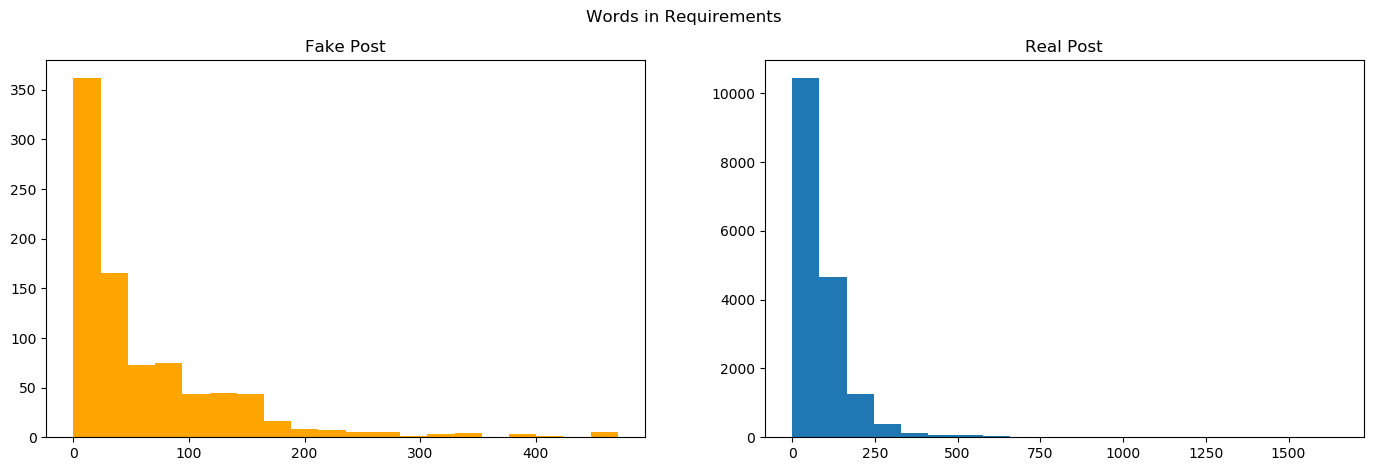

In [14]:
# Word Count in Requirements
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]=='Fake']['requirements'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orange')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]=='Real']['requirements'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in Requirements')
plt.show()

#### Characters & Word Counts in Requirements are relatively the same.

### Benefits

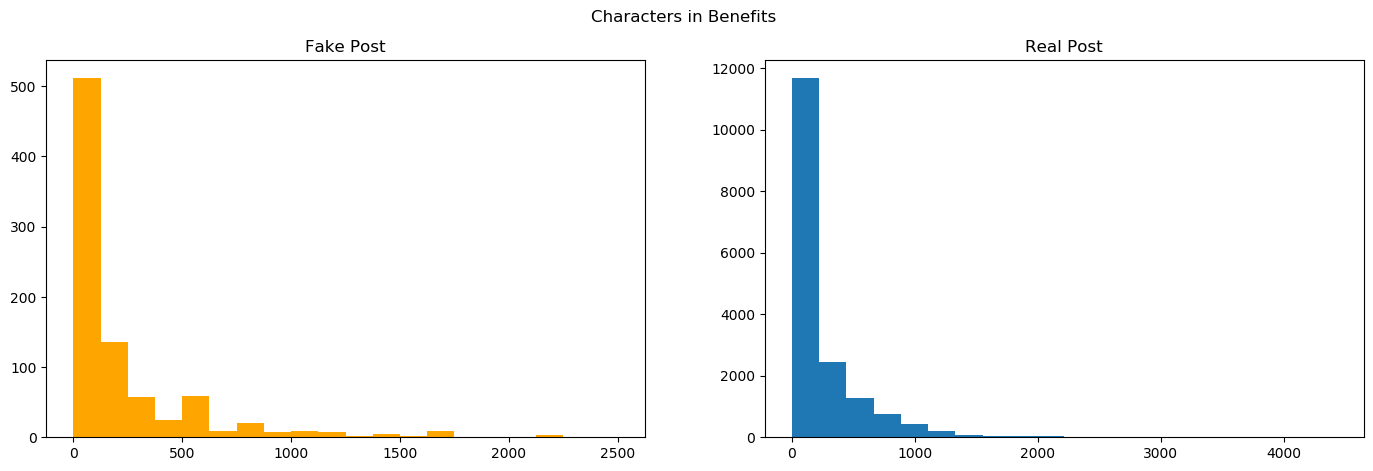

In [15]:
# Characters in Benefits
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]=='Fake']['benefits'].str.len()
ax1.hist(length,bins = 20,color='orange')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]=='Real']['benefits'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in Benefits')
plt.show()

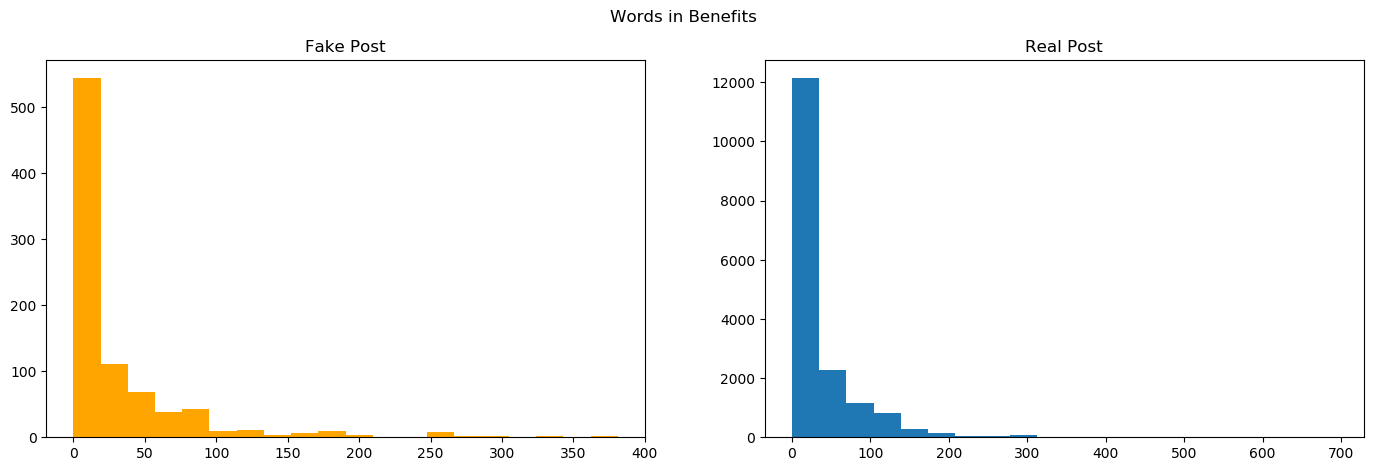

In [16]:
# Word Count in Benefits
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]=='Fake']['benefits'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orange')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]=='Real']['benefits'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in Benefits')
plt.show()

#### Characters & Word Counts in Benefits are relatively the same.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


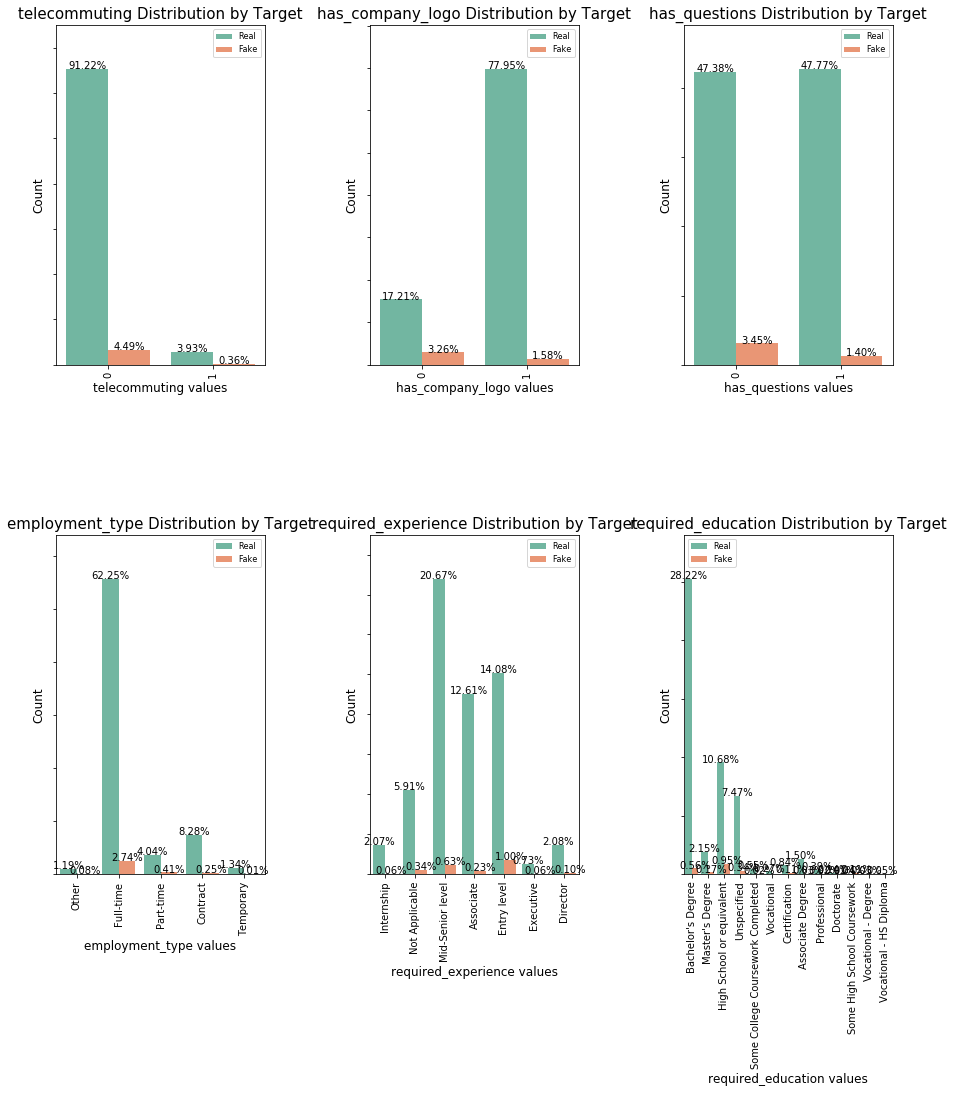

In [22]:
job_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education"]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(jobpost_df[job_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=jobpost_df, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(jobpost_df)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


plt.show()

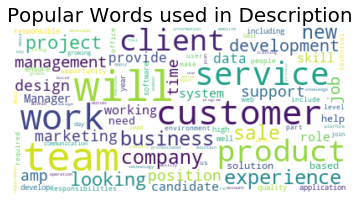

In [101]:
# Wordcloud for Description 
fakepost_des = []
fakepost_des = jobpost_df['description'].astype(str)
fakepost_des = [x for x in fakepost_des if str(x) != 'nan']
stopwords = STOPWORDS
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", mode="RGBA",stopwords=stopwords, collocations=False).generate(' '.join
                                                                                           (fakepost_des))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Words used in Description", fontsize=20)
# plt.savefig("figures/descriptionWordCloud.png")
plt.show()

In [102]:
# (want to make a wordcloud and filter down to Fake Job Posts to see what the most popular words or misspellings there may be)
fakepost_dscrp = jobpost_df[(jobpost_df.fraudulent == 'Fake')].astype(str)
print(fakepost_dscrp.shape)

(866, 16)


In [104]:
# Wordcloud for Description (want to make a wordcloud and filter down to Fake Job Posts to see what the most popular words
# or misspellings there may be)
fakeposts_df = fakepost_dscrp.groupby(['description', 'fraudulent'])

des = []
des = fakeposts_df['description'].astype(str)
des = [x for x in des if str(x) != 'nan']
stopwords = STOPWORDS
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", mode="RGBA",stopwords=stopwords, collocations=False).generate(' '.join
                                                                                           (des))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Words used in Description", fontsize=20)
# plt.savefig("figures/descriptionWordCloud.png")
plt.show()

AttributeError: Cannot access callable attribute 'astype' of 'SeriesGroupBy' objects, try using the 'apply' method

In [96]:
fraud_des = fakepost_des.groupby(['description', 'fraudulent'])
# fakeposts = []
# fakeposts = [x for x in fraud_des if str(x) != 'nan']

fraud_posts_des = []

for text in fraud_des:
    text = [x.strip(string.punctuation) for x in text]
    fraud_posts_des.append(text)

fraud_posts_des[0]

text_fake = [" ".join(text) for text in fraud_posts_des]
final_text_fake = " ".join(text_fake)
final_text_fake[:500]

AttributeError: 'list' object has no attribute 'groupby'

In [82]:

fakeposts_des = jobpost_df[(jobpost_df['fraudulent'] == 'Fake')].astype(str)
fakeposts_df = fakeposts_des.groupby(['description', 'fraudulent'])
fakeposts = []               
fakeposts = [x for x in fakeposts_df if str(x) != 'nan']
                        
stopwords = STOPWORDS
wordcloud = WordCloud(width=500,height=400,background_color="coral",mode="RGBA",stopwords=stopwords, max_font_size=80,collocations=False).generate(' '.join
                                                                                           (fakeposts))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Popular Words in Fake Posts", fontsize=20)
# plt.savefig("figures/Popular_Genres.png")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.